# Trabajo practico N° 8

## Enunciado

Fecha de entrega: **21/06/2017**

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

1. Un entorno denominado **"windy gridworld"** consiste en un agente que se mueve en una grilla formada por un conjunto de celdas, cada una de las cuales se corresponde con un estado. La particularidad de este entorno es que el mismo es atravesado de abajo hacia arriba por viento, el cual sopla siempre en la misma dirección pero con distinta fuerza en cada columna del gridworld (Ver Figura). En cada una de las celdas, el agente puede ejecutar una entre cuatro acciones posibles: norte, sur, este y oeste, las que producen el efecto de mover el agente hacia la celda adyacente de acuerdo a la acción ejecutada (de manera determinística). Sin embargo, en aquellas columnas afectadas por el viento, el efecto de las acciones que llevan al agente a alguna de dichas columnas es que el mismo es arrastrado hacia arriba tantas celdas como indique la fuerza del viento, a partir de la celda a la que debería haber arribado como efecto de la transición. Aquella acción que lleva al agente fuera de la grilla, tiene el efecto de mantener al mismo en la misma celda. Todas las acciones producen una recompensa de -1.

![](images/WindyGridworld.png)

Dada la implementación de SARSA para el entorno mencionado:

1.1 Modifique la implementación para que el agente aprenda la política óptima empleando Q-Learning. Mantenga la política empleada en la implementación (e-greedy).

1.2 Modifique la implementación anterior para que el agente aprenda la política óptima empleando Sarsa($\lambda$). Mantenga la política empleada en la implementación (e-greedy).

1.3 Compare la convergencia de la implementación original respecto a la implementación de Q-Learning y Sarsa($\lambda$) empleando una gráfica de Steps Acumulados Promedio vs. Episodio.

1.4 Muestre el resultado de la política aprendida en cada caso.

1.5 Modifique la implementación en 1.2 empleando los King's Moves (Ver Figura Windy Gridworld).

1.6 Modifique la implementación en 1.2 asumiendo que la fuerza del viento varía de manera equiprobable entre el valor A  establecido originalmente y A+1, A-1, el cual se determina para cada transición efectuada.

1.7 Analice la convergencia de Sarsa($\lambda$) en 1.6 para 4 valores distintos de $\lambda$.

## Desarrollo

#### 1.1 Se modifica la implementación para que el agente aprenda la política óptima empleando Q-Learning, manteniendo la política empleada en la implementación (e-greedy).

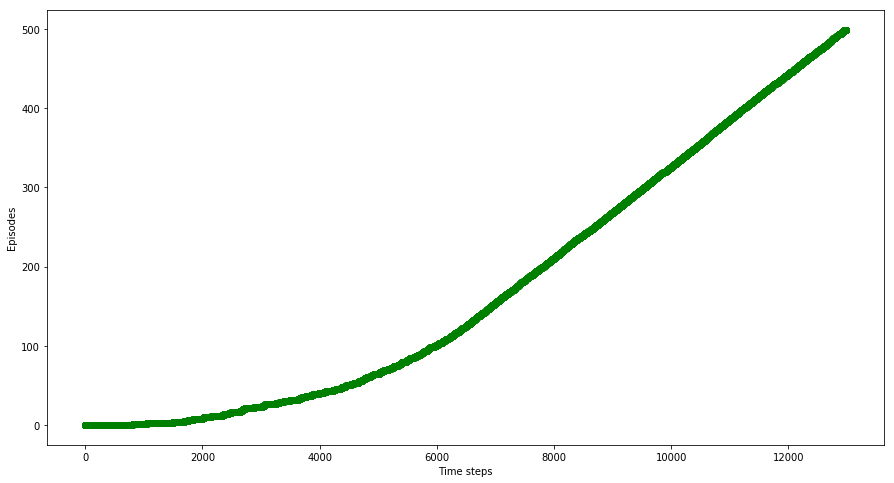

['L', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'L', 'R', 'G', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'D', 'U', 'D', 'L', 'L']
['R', 'U', 'D', 'U', 'R', 'U', 'U', 'D', 'L', 'R']
['L', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [1]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0
    # estado inicial y accion inicial
    currentState = startState
    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        
        # selección de acción basado en epsilon-greedy
        if np.random.binomial(1, EPSILON) == 1:
            currentAction = np.random.choice(actions)
        else:
            currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])  
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        
        # Q-learning update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        currentState = newState
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(15,8))
plt.plot(episodes, 'o', color='green')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)
print([str(w) for w in WIND])

#### 1.2 Se modifica la implementación anterior para que el agente aprenda la política óptima empleando Sarsa($\lambda$) *para prediccion de accion-valor*, manteniendo la política empleada en la implementación (e-greedy).

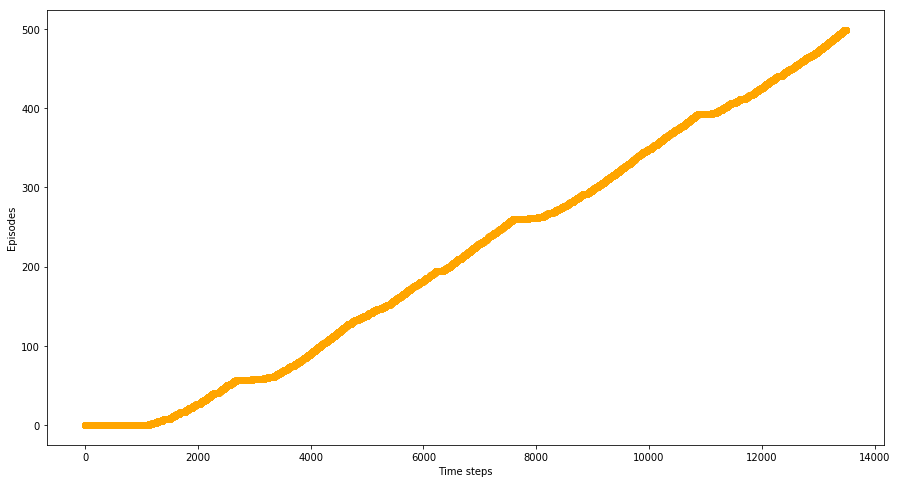

['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'R', 'R', 'U', 'L', 'U', 'D', 'L', 'R', 'D']
['D', 'R', 'D', 'R', 'R', 'R', 'L', 'U', 'D', 'D']
['R', 'R', 'R', 'R', 'L', 'U', 'L', 'G', 'R', 'D']
['L', 'R', 'R', 'U', 'R', 'R', 'U', 'D', 'L', 'L']
['R', 'D', 'U', 'L', 'R', 'U', 'U', 'R', 'R', 'D']
['U', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [2]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# GAMMA
GAMMA = 0.9
# Lambda
LAMBDA = 0.9

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
# Eligibility trace 
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa lambda update
        DELTA = REWARD + GAMMA * stateActionValues[newState[0], newState[1], newAction] - stateActionValues[currentState[0], currentState[1], currentAction]
        e[currentState[0], currentState[1], currentAction] += 1
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * DELTA * e[i, j, action]
                    e[i ,j, action] *= LAMBDA * GAMMA
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(15,8))
plt.plot(episodes, 'o', color='orange')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)
print([str(w) for w in WIND])

#### 1.3 Se compara la convergencia de la implementación original respecto a la implementación de Q-Learning y Sarsa($\lambda$) empleando una gráfica de Steps Acumulados Promedio vs. Episodio.

Primero se realiza la toma de datos para Sarsa

In [3]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# Inicializamos los vectores de los ejes para comparar
x_sarsa = []
y_sarsa = []

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios
episodeLimit = 500
ep = 0
total_times = 0
while ep < episodeLimit:
    # Acumulamos la cantidad de steps por episodio
    total_times += oneEpisode()
    # Guardamos el episodio actual en x
    x_sarsa.append(ep)
    # Obtenemos el step acumulado promedio 
    y_sarsa.append(total_times/(ep+1))
    ep += 1

# Selección Greedy sobre la política...
optimalPolicySarsa = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsa.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsa[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsa[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsa[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsa[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsa[-1].append('R')


Luego se realiza la toma de datos para Q-Learning

In [4]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Inicializamos los vectores de los ejes para comparar
x_q_learning = []
y_q_learning = []

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0
    # estado inicial y accion inicial
    currentState = startState
    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        
        # selección de acción basado en epsilon-greedy
        if np.random.binomial(1, EPSILON) == 1:
            currentAction = np.random.choice(actions)
        else:
            currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])  
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        
        # Q-learning update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        currentState = newState
        time += 1
    return time
# Cantidad de episodios

episodeLimit = 500
ep = 0
total_times = 0
while ep < episodeLimit:
    # Acumulamos la cantidad de steps por episodio
    total_times += oneEpisode()
    # Guardamos el episodio actual en x
    x_q_learning.append(ep)
    # Obtenemos el step acumulado promedio 
    y_q_learning.append(total_times/(ep+1))
    ep += 1

# Selección Greedy sobre la política...
optimalPolicyQLearning = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicyQLearning.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicyQLearning[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicyQLearning[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicyQLearning[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicyQLearning[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicyQLearning[-1].append('R')

Por ultimo realizamos la toma de datos de Sarsa($\lambda$)

In [5]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Descuento
GAMMA = 0.9

# Lambda
LAMBDA = 0.9

# Eligibility trace 
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

# Inicializamos los vectores de los ejes para comparar
x_sarsa_lambda = []
y_sarsa_lambda = []

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa lambda update
        DELTA = REWARD + GAMMA * stateActionValues[newState[0], newState[1], newAction] - stateActionValues[currentState[0], currentState[1], currentAction]
        e[currentState[0], currentState[1], currentAction] += 1
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * DELTA * e[i, j, action]
                    e[i ,j, action] *= LAMBDA * GAMMA
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
total_times = 0
while ep < episodeLimit:
    # Acumulamos la cantidad de steps por episodio
    total_times += oneEpisode()
    # Guardamos el episodio actual en x
    x_sarsa_lambda.append(ep)
    # Obtenemos el step acumulado promedio 
    y_sarsa_lambda.append(total_times/(ep+1))
    ep += 1

# Selección Greedy sobre la política...
optimalPolicySarsaLambda = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsaLambda.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsaLambda[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsaLambda[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsaLambda[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsaLambda[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsaLambda[-1].append('R')

Graficamos los resultados comparando la convergencia

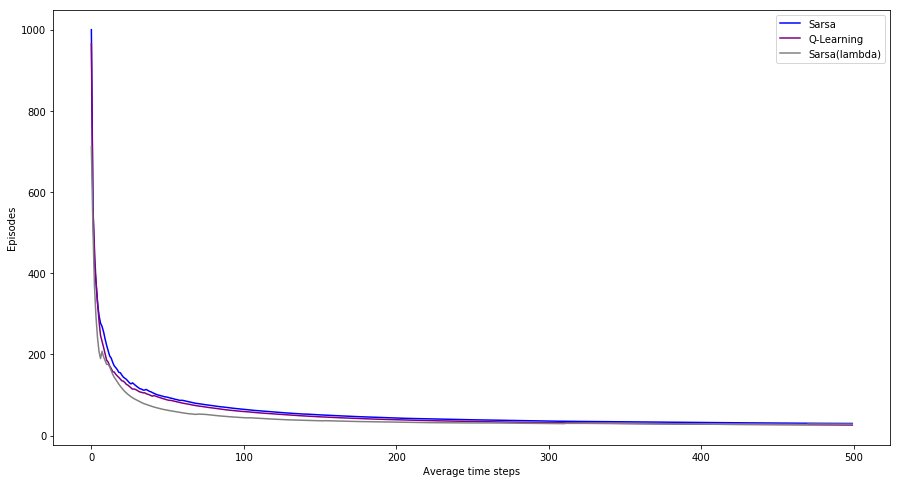

In [6]:
plt.figure(figsize=(15,8))
plt.plot(x_sarsa, y_sarsa, color='blue', label='Sarsa')
plt.plot(x_q_learning, y_q_learning, color='purple', label='Q-Learning')
plt.plot(x_sarsa_lambda, y_sarsa_lambda, color='gray', label='Sarsa(lambda)')
plt.legend(loc='best')
plt.xlabel('Average time steps')
plt.ylabel('Episodes')
plt.show()

#### 1.4 Se muestra el resultado de la política aprendida en cada caso.

El resultado de la politica aprendida para el caso de Sarsa es el siguiente:

In [7]:
for row in optimalPolicySarsa:
    print(row)
print([str(w) for w in WIND])

['R', 'D', 'D', 'R', 'R', 'R', 'U', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'R', 'D']
['U', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'D', 'D']
['R', 'D', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'D']
['D', 'D', 'D', 'R', 'R', 'U', 'U', 'D', 'L', 'L']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


El resultado de la politica aprendida para el caso de Q-Learning es el siguiente:

In [8]:
for row in optimalPolicyQLearning:
    print(row)
print([str(w) for w in WIND])

['U', 'R', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'D']
['D', 'R', 'R', 'R', 'D', 'R', 'U', 'D', 'L', 'L']
['U', 'R', 'R', 'R', 'D', 'U', 'U', 'R', 'L', 'L']
['L', 'U', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'D']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


El resultado de la politica aprendida para el caso de SARSA($\lambda$) es el siguiente:

In [9]:
for row in optimalPolicySarsaLambda:
    print(row)
print([str(w) for w in WIND])

['D', 'L', 'D', 'L', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'L', 'D', 'R', 'R', 'D', 'R', 'R', 'R', 'D']
['L', 'R', 'D', 'R', 'U', 'R', 'L', 'D', 'L', 'D']
['R', 'U', 'R', 'R', 'R', 'R', 'R', 'G', 'D', 'R']
['D', 'D', 'L', 'R', 'R', 'R', 'U', 'R', 'L', 'R']
['D', 'D', 'U', 'R', 'L', 'U', 'U', 'D', 'R', 'L']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'R', 'U']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


#### 1.5 Se modifica la implementación en 1.2 empleando los King's Moves.

Para este caso se asume que cuando se realiza un movimiento que envia al agente fuera de la grilla, el mismo queda en el último estado antes de irse, por ejemplo, si el agente esta en el estado [0,0] y ejecuta la acción DL (Down-Left) el mismo quedara en el estado [1,0]. Esto se debe a que ejecuta la acción Down, pero no la acción Left, la que lo enviaría fuera de la grilla.

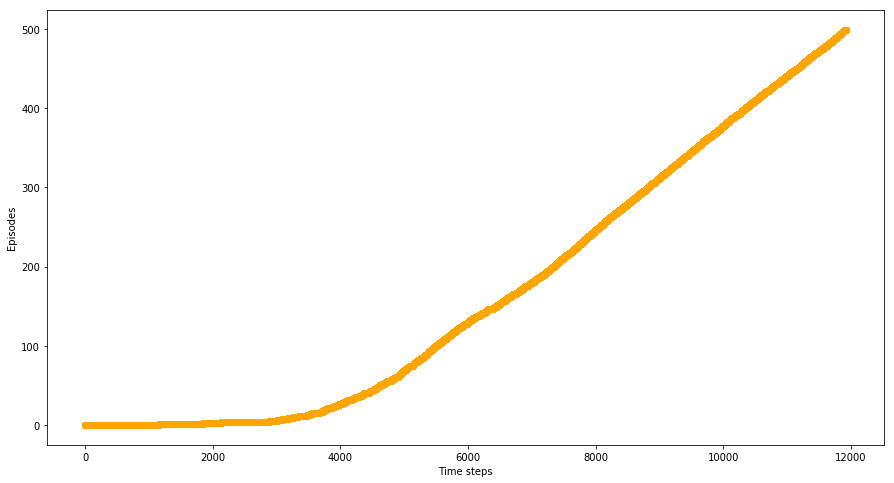

['UR', 'R ', 'UR', 'DR', 'UR', 'R ', 'DR', 'DR', 'DR', 'DR']
['L ', 'UR', 'DR', 'UL', 'UR', 'R ', 'UR', 'UR', 'UR', 'DR']
['UR', 'UR', 'R ', 'R ', 'UR', 'DR', 'U ', 'UR', 'R ', 'DL']
['R ', 'UR', 'UR', 'R ', 'DR', 'R ', 'R ', 'G ', 'DL', 'U ']
['DR', 'DR', 'DR', 'U ', 'D ', 'DL', 'DR', 'R ', 'D ', 'UL']
['DR', 'UR', 'UR', 'R ', 'R ', 'L ', 'L ', 'D ', 'DL', 'D ']
['U ', 'DR', 'R ', 'U ', 'DR', 'D ', 'U ', 'U ', 'UL', 'R ']
['0 ', '0 ', '0 ', '1 ', '1 ', '1 ', '2 ', '2 ', '1 ', '0 ']


In [10]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTION_UP_LEFT = 4
ACTION_UP_RIGHT = 5
ACTION_DOWN_RIGHT = 6
ACTION_DOWN_LEFT = 7

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Descuento
GAMMA = 0.9

# Lambda
LAMBDA = 0.9

# Eligibility trace 
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 8))
# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 8))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT, ACTION_UP_LEFT, ACTION_UP_RIGHT, ACTION_DOWN_RIGHT, ACTION_DOWN_LEFT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        destination[ACTION_UP_LEFT] = [max(i - 1 - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_UP_RIGHT] = [max(i - 1 - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        destination[ACTION_DOWN_RIGHT] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), min(j + 1, WORLD_WIDTH - 1)]
        destination[ACTION_DOWN_LEFT] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), max(j - 1, 0)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa lambda update
        DELTA = ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        e[currentState[0], currentState[1], currentAction] += 1
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * DELTA * e[i, j, action]
                    e[i ,j, action] *= GAMMA * LAMBDA 
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(15,8))
plt.plot(episodes, 'o', color='orange')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G ')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U ')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D ')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L ')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R ')
        elif bestAction == ACTION_UP_LEFT:
            optimalPolicy[-1].append('UL')
        elif bestAction == ACTION_UP_RIGHT:
            optimalPolicy[-1].append('UR')
        elif bestAction == ACTION_DOWN_RIGHT:
            optimalPolicy[-1].append('DR')
        elif bestAction == ACTION_DOWN_LEFT:
            optimalPolicy[-1].append('DL')

for row in optimalPolicy:
    print(row)
print([str(w) + ' ' for w in WIND])

#### 1.6 Se modifica la implementación en 1.2 asumiendo que la fuerza del viento varía de manera equiprobable entre el valor A  establecido originalmente y A+1, A-1, el cual se determina para cada transición efectuada.

Se asume que no puede haber un viento negativo (Hacia abajo), por lo tanto se realizara el viento aleatorio cuando el viento no sea 0.

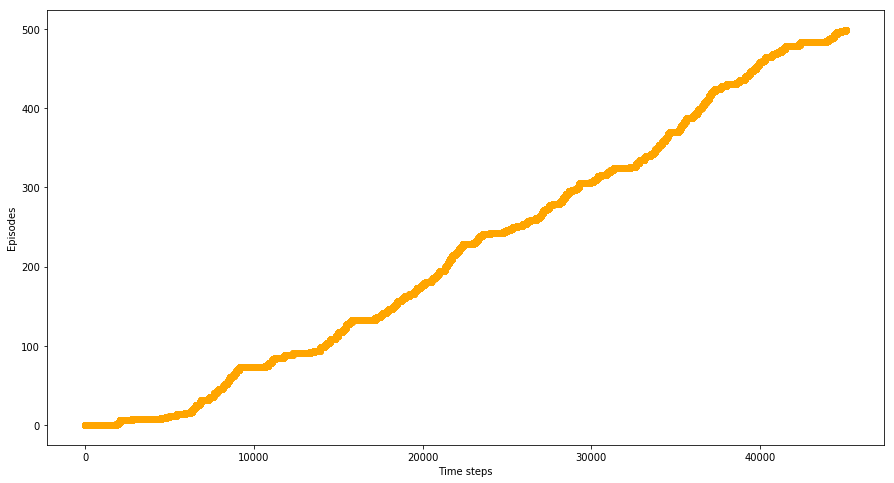

['D', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'R', 'D', 'D', 'D', 'R', 'L', 'D', 'R', 'D']
['D', 'L', 'R', 'U', 'R', 'R', 'L', 'L', 'L', 'D']
['D', 'U', 'D', 'L', 'R', 'R', 'R', 'G', 'R', 'D']
['D', 'L', 'D', 'R', 'R', 'R', 'R', 'L', 'D', 'L']
['D', 'D', 'D', 'R', 'D', 'R', 'R', 'U', 'L', 'U']
['R', 'R', 'R', 'R', 'U', 'R', 'D', 'L', 'D', 'U']


In [11]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
import random

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Descuento
GAMMA = 0.9

# Lambda
LAMBDA = 0.9

# Eligibility trace 
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

def action_destination(i, j, action):
    if WIND[j] != 0:
        RANDOM_WIND = max(min(random.choice([WIND[j] - 1, WIND[j], WIND[j] + 1]), WORLD_HEIGHT - 1), 0)
    else:
        RANDOM_WIND = 0
    destination = dict()
    destination[ACTION_UP] = [max(i - 1 - RANDOM_WIND, 0), j]
    destination[ACTION_DOWN] = [max(min(i + 1 - RANDOM_WIND, WORLD_HEIGHT - 1), 0), j]
    destination[ACTION_LEFT] = [max(i - RANDOM_WIND, 0), max(j - 1, 0)]
    destination[ACTION_RIGHT] = [max(i - RANDOM_WIND, 0), min(j + 1, WORLD_WIDTH - 1)]
    return destination[action]

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = action_destination(currentState[0], currentState[1], currentAction)
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa lambda update
        DELTA = REWARD + GAMMA * stateActionValues[newState[0], newState[1], newAction] - stateActionValues[currentState[0], currentState[1], currentAction]
        e[currentState[0], currentState[1], currentAction] += 1
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * DELTA * e[i, j, action]
                    e[i ,j, action] *= LAMBDA * GAMMA
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(15,8))
plt.plot(episodes, 'o', color='orange')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)

#### 1.7 Se analiza la convergencia de Sarsa($\lambda$) en 1.6 para 4 valores distintos de $\lambda$. Se emplea una gráfica de Steps Acumulados Promedio vs. Episodio

Calculando convergencia para LAMBDA= 0.6
Calculando convergencia para LAMBDA= 0.7
Calculando convergencia para LAMBDA= 0.8
Calculando convergencia para LAMBDA= 0.9


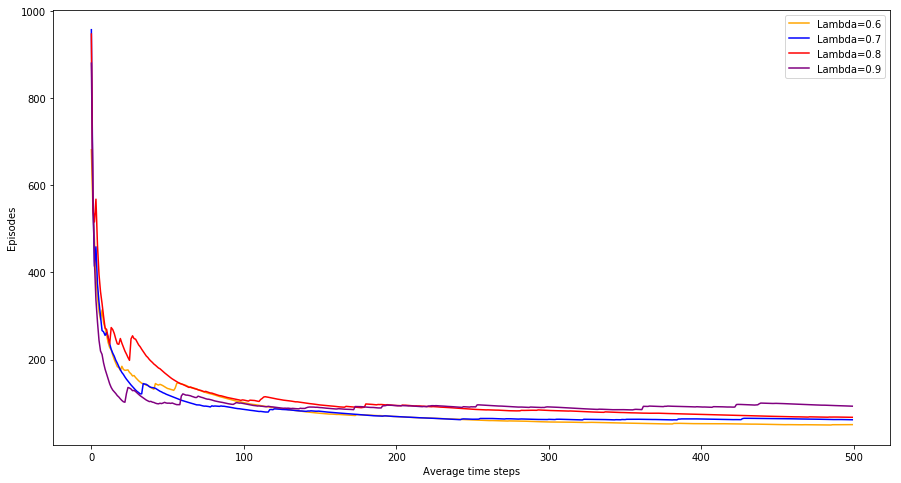

In [12]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
import random

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Descuento
GAMMA = 0.9

# Lambda
LAMBDAS = [0.6,0.7,0.8,0.9]
plt.figure(figsize=(15,8))
for LAMBDA in LAMBDAS:
    print('Calculando convergencia para LAMBDA=', LAMBDA)
    # Eligibility trace 
    e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
    
    # Inicializamos los vectores de los ejes para comparar
    x_sarsa_lambda = []
    y_sarsa_lambda = []

    # valor de los pares estado acción
    stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
    startState = [3, 0]
    goalState = [3, 7]
    actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

    # transiciones de estado
    def action_destination(i, j, action):
        if WIND[j] != 0:
            RANDOM_WIND = max(min(random.choice([WIND[j] - 1, WIND[j], WIND[j] + 1]), WORLD_HEIGHT - 1), 0)
        else:
            RANDOM_WIND = 0
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - RANDOM_WIND, 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - RANDOM_WIND, WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - RANDOM_WIND, 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - RANDOM_WIND, 0), min(j + 1, WORLD_WIDTH - 1)]
        return destination[action]

    # interacción en un episodio
    def oneEpisode():
        # acumulador de steps en el episodio
        time = 0

        # estado inicial
        currentState = startState
        if np.random.binomial(1, EPSILON) == 1:
            currentAction = np.random.choice(actions)
        else:
            currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

        # interactuar hasta arribar al estado objetivo
        while currentState != goalState:
            newState = action_destination(currentState[0], currentState[1], currentAction)
            if np.random.binomial(1, EPSILON) == 1:
                newAction = np.random.choice(actions)
            else:
                newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
            # Sarsa lambda update
            DELTA = REWARD + GAMMA * stateActionValues[newState[0], newState[1], newAction] - stateActionValues[currentState[0], currentState[1], currentAction]
            e[currentState[0], currentState[1], currentAction] += 1
            for i in range(0, WORLD_HEIGHT):
                for j in range(0, WORLD_WIDTH):
                    for action in actions:
                        stateActionValues[i, j, action] += ALPHA * DELTA * e[i, j, action]
                        e[i ,j, action] *= LAMBDA * GAMMA
            currentState = newState
            currentAction = newAction
            time += 1
        return time


    # Cantidad de episodios

    episodeLimit = 500
    ep = 0
    total_times = 0
    while ep < episodeLimit:
        # Acumulamos la cantidad de steps por episodio
        total_times += oneEpisode()
        # Guardamos el episodio actual en x
        x_sarsa_lambda.append(ep)
        # Obtenemos el step acumulado promedio 
        y_sarsa_lambda.append(total_times/(ep+1))
        ep += 1
    # Selección Greedy sobre la política...
    optimalPolicy = []
    for i in range(0, WORLD_HEIGHT):
        optimalPolicy.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == goalState:
                optimalPolicy[-1].append('G')
                continue
            bestAction = np.argmax(stateActionValues[i, j, :])
            if bestAction == ACTION_UP:
                optimalPolicy[-1].append('U')
            elif bestAction == ACTION_DOWN:
                optimalPolicy[-1].append('D')
            elif bestAction == ACTION_LEFT:
                optimalPolicy[-1].append('L')
            elif bestAction == ACTION_RIGHT:
                optimalPolicy[-1].append('R')
    if LAMBDA == LAMBDAS[0]:
        plt.plot(x_sarsa_lambda, y_sarsa_lambda, color='orange', label='Lambda='+str(LAMBDA))
    if LAMBDA == LAMBDAS[1]:
        plt.plot(x_sarsa_lambda, y_sarsa_lambda, color='blue', label='Lambda='+str(LAMBDA))
    if LAMBDA == LAMBDAS[2]:
        plt.plot(x_sarsa_lambda, y_sarsa_lambda, color='red', label='Lambda='+str(LAMBDA))
    if LAMBDA == LAMBDAS[3]:
        plt.plot(x_sarsa_lambda, y_sarsa_lambda, color='purple', label='Lambda='+str(LAMBDA))

plt.legend(loc='best')
plt.xlabel('Average time steps')
plt.ylabel('Episodes')
plt.show()